# <font color='red'>Lab 06 - Yeti Socialization Lab</font>

### EARTH 468: Data Analysis & Model Estimation

##### Lab developed by E.A. Hetland

#### Due by the beginning of the lab period for the week of October 26, 2021 (2 weeks).

**For full credit:** 

Be sure to include your name with your notebook either as a markdown cell or in the file name. 

Write any necessary code in code cells below the description of each question. Write any discussion answers in markdown cells below the code cells, not as comments in your code. Be explicit about what you are answering and write in complete sentences. 

If you are asked to include a plot, make sure to label the axes and include a descriptive title.

To turn in this assignment, in the Jupyter toolbar select File/Download as/html or pdf. Make sure that all of your outputs are clear. Upload the downloaded file to the proper assignment submission page on Canvas. Please do not turn in a .ipynb file.

**Objective:** To gain an understanding of the concept of leveraging in model fitting. 

**Python Objective:** To implement a linear least squares solution. 

**Data:** The data in this lab are entirely made up, and any resemblances to data sets that may be copyrighted by textbook publishers, particularly after those datasets were in the public domain for decades prior, is entirely circumstantial. The data is in *SocialYetis-Data.csv*. 

# <font color='orange'>Excercise - 40 pts</font>

A visiting professor at the University of Michigan Yeti Activity Center (UM-YAC) has just returned from the Sakteng Yeti reserve, in the Kingdom of Bhutan, where she spent the last six years tracking and studying Yetis. The visiting professor observed that Yetis exhibit a complex social behaviour, involving long stretches of solitude, but then forming a pack to collectively care for the upbringing of juvenile Yetis. The visiting professors observed that adolescent Yetis tend to separate from the nominal pack that raised them, setting out to make their way in the wild, in the age range that she estimates is 10–20 years old. Furthermore, the adolescent Yetis also have a range of social skills, judged from their interaction with the adult Yetis. The visiting professor has collected data on nine Yetis, and estimated both their age at separation from the pack and their perceived socialization measure. 

The visiting professor estimated the Yeti ages at separation, and assessed that the estimated ages were good to ±1 year at the 95% confidence. Socialization was quantified on a scale of 0–1, and the visiting professor felt that the estimated socialization scores were good to ±0.09 at 95% confidence. 

The data is in the file *SocialYetis-Data.csv,* with age in the first column, and socialization score in the second: 

<img src="Lab06_yeti.png">

The UM-YAC PI hands the data off to you, knowing that you have learned advanced statistical reasoning in EARTH 468, and asks you to fit linear models to the data (the UM-YAC PI and visiting professor are too pre-occupied with chilling the champagne and writing their acceptance speech for their anticipated Nobel prize in physiology). 
You decide to use least squares regression to investigate a linear relationship between separation age and socialization. As there are uncertainties on both variates of the paired data, you are unsure what variate should be considered the context and what should be considered the data. Additionally, it is not clear if one of the variates is dependent on the other. So you decide to try both cases. As all of the errors in age or socialization are equal, then the errors themselves will not bias the solution (as we shall see in later lectures), so you ignore the errors. 

# <font color='red'>Import Libraries:</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <font color='red'>a) 5 pts</font>

Explain what the difference is between “context” and “data”, in the perspective of EARTH 468 and regression. Specifically, what is the implicit assumption made in choosing to treat either age or socialization score as data or data context?


Data is a measurement that inherently has some uncertainty associated with it. Data context is something we assume we know perfectly, the uncertainty on data context is so small compared to uncertainty on the data that it is negligible. We see a fairly similar magnitude of uncertainty on both age and socialization, so we don't know which should be data and which should be data context. Whichever you choose to be data context, you're assuming a negligible uncertainty associated with it compared to the data uncertainty.

## <font color='red'>b) 10 pts</font>

In the first step you decide to treat socialization score as the data, and age as the data context, and propose the following system: 

$socialization = m_1 + m_2 age$

Find the least squares solution to the above system.

Recall that if we assume there are no uncertainties in the data, $m_{est}=\left(G^TG\right)^{-1}G^Td$. Consider using the following design matrix, $G$:

$G_{(linear)} = \begin{pmatrix} 1 & context_1 \\
                     1 & context_2 \\
                     \vdots & \vdots \\
                     1 & context_n \end{pmatrix} $

Also recall that the best-fit solution is $Y_{bf}=G m_{est}$.

<b> Include in the lab write-up both the solution and a plot showing the data and the prediction of the best-fit model. </b>


In [2]:
example_array = np.arange(1,10)
example_array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.repeat(1,example_array.shape[0]) # repeats "1" 9 times

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
np.vstack((np.repeat(1,example_array.shape[0]),example_array)).T # transpose array

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [1, 9]])

In [5]:
def linear_G(context):
    return np.vstack((np.repeat(1,context.shape[0]),context)).T

def LS(G,d): # G: design matrix; d: data
    return np.linalg.inv(G.T@G)@G.T@d # "@" to multiply matrices
    # return np.dot(np.dot(np.linalg.inv(np.dot(G.T,G)),G.T),d)

In [6]:
df = pd.read_csv('SocialYetis-Data.csv',header=None)
data = np.array(df)
age = data[:,0]
social = data[:,1]

In [7]:
G_agecontext = linear_G(age)
LS_agecontext = LS(G_agecontext,social) # outputs line intercept, line slope
Y_socialprediction = G_agecontext@LS_agecontext
Y_socialprediction
LS_agecontext

array([-0.1654426 ,  0.07330142])

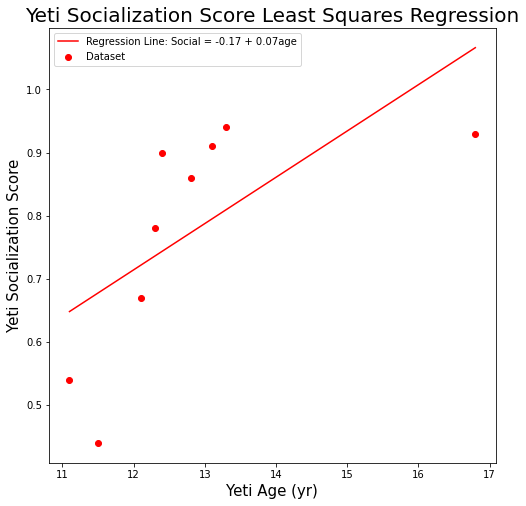

In [25]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter(age,social,label='Dataset',color='red')
ax.plot(age,Y_socialprediction,color='red',label='Regression Line: Social = {} + {}age'.format(*np.round(LS_agecontext,2)))
ax.set_xlabel('Yeti Age (yr)',size=15)
ax.set_ylabel('Yeti Socialization Score',size=15)
ax.set_title('Yeti Socialization Score Least Squares Regression',size=20)
ax.legend()

## <font color='red'>c) 5 pts</font>

<b>Are there systematic misfits of the best fit solution found in part (b) compared to the data? If so, what do the misfits signify in terms of the proposed system and what data feature is responsible for causing the systematic misfits? </b>

By “systematic misfits”, we mean coherent trends in the data that are not well described by the model. You will want to create a scatter plot of your residuals to interpret this.


In [30]:
def residuals(prediction,data):
    return prediction-data

social_residuals = residuals(Y_socialprediction,social)
social_residuals

array([ 0.10820312,  0.23752368,  0.05150453, -0.04383518, -0.15650504,
       -0.08718448, -0.11519405, -0.13053377,  0.13602119])

Text(0.5, 1.0, 'Residual Plot for Yeti Socialization Data')

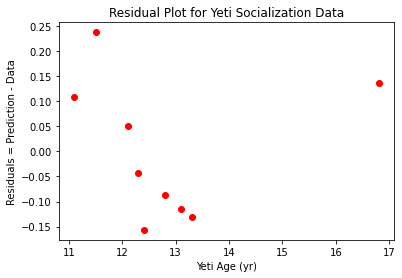

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(age,social_residuals,color='red')
ax.set_xlabel('Yeti Age (yr)')
ax.set_ylabel('Residuals = Prediction - Data')
ax.set_title('Residual Plot for Yeti Socialization Data')

There is a systematic misfit of the best fit solution found in part (b) compared to the data because the part (b) plot showed age 17 data is shifting the overall regression line downward (lower slope). This could be from ignoring the error in age data, because we assume the age as data context, so with negligible uncertainty. The gap between the best fit line and original data shows a systematic misfit.

## <font color='red'>d) 10 pts</font>

In the second step you decide to treat age as the data, and socialization score as the data context, and propose the following system: 

$age = m_1 + m_2 socialization$

Find the least squares solution to the above system. 
*Hint: use the linear design matrix function and the least squares that you created in part b*.

<b> Include in the lab write-up both the solution and a plot showing the data and the prediction of the best-fit model. </b>

In [27]:
G_socialcontext = linear_G(social)
LS_socialcontext = LS(G_socialcontext,age) 
Y_ageprediction = G_socialcontext@LS_socialcontext
Y_ageprediction

array([11.43790925, 10.847444  , 12.20551407, 12.85502585, 13.56358415,
       13.32739805, 13.62263067, 13.79977025, 13.74072372])

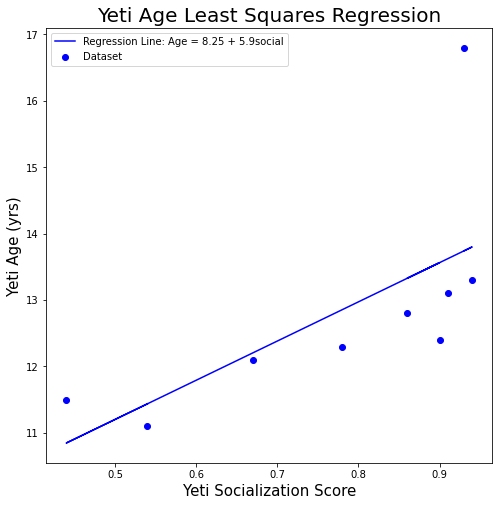

In [26]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.scatter(social,age,label='Dataset',color='blue')
ax.plot(social,Y_ageprediction,color='blue',label='Regression Line: Age = {} + {}social'.format(*np.round(LS_socialcontext,2)))
ax.set_xlabel('Yeti Socialization Score',size=15)
ax.set_ylabel('Yeti Age (yrs)',size=15)
ax.set_title('Yeti Age Least Squares Regression',size=20)
ax.legend()

## <font color='red'>e) 5 pts</font>

<b>Are there systematic misfits of the best fit solution found in part (d) compared to the data? If so, what do the misfits signify in terms of the proposed system and what data feature is responsible for causing the systematic misfits?</b>

By “systematic misfits”, we mean coherent trends in the data that are not well described by the model. You will want to create a scatter plot of your residuals to interpret this.

In [29]:
age_residuals = residuals(Y_ageprediction,age)
age_residuals

array([ 0.33790925, -0.652556  ,  0.10551407,  0.55502585,  1.16358415,
        0.52739805,  0.52263067,  0.49977025, -3.05927628])

Text(0.5, 1.0, 'Residual Plot for Yeti Age Data')

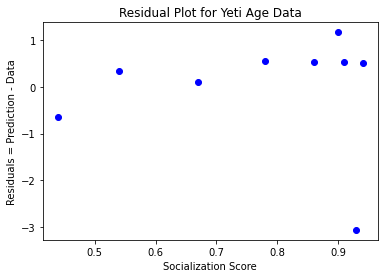

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(social,age_residuals,color='blue')
ax.set_xlabel('Socialization Score')
ax.set_ylabel('Residuals = Prediction - Data')
ax.set_title('Residual Plot for Yeti Age Data')

There isn't as much of a clear systematic misfit in part (d) as compared to part (b) because there is less of a gap along the x axis (so regression line is not shifted as much and less impact overall on best fit line). However, the older yeti data still does not fit well into the best fit line. 

## <font color='red'>f) 5 pts</font>


Are the solutions found in parts (b) and (d) equivalent? If not, explain what the difference is and what is causing the difference. 


Our two solutions are: social = -0.17 + 0.07age and age = 8.25 + 5.9social. 

These two solutions found in parts (b) and (d) are not equivalent (if you compare them algebraically). The difference is a result of leveraging. We changed axes, so age was the x axis (data context) of the first plot while socialization score was the x axis (data context) of the second plot. So when socialization is the context then the data spans the whole x axis which is good, but when age is the context, we have a huge gap in our data context, which is a problem for the best fit line. This causes our solutions to be dissimilar.